# Introduction to Machine Learning Exercise 6
## Problem 1
### a)

In [1]:
source("load_mnist.R")
load_mnist()
x_train <- train$x[1:5000, ]
y_train <- train$y[1:5000]
x_test <- test$x[1:1000, ] 
y_test <- test$y[1:1000]

distances <- matrix(numeric(5000*1000), nrow = 5000)

for(i in 1:5000) {
    for(j in 1:1000) {
        distances[i,j] <- sqrt(sum((x_train[i, ]-x_test[j, ])^2))
    }
}
distances[1,1] #should be about 2395.8

[1] 2395.796

### b)

In [2]:
k_NN <- function(k, trainData, testData, distances) {
    class <- numeric(length(testData))
    for(i in 1:length(class)) {
        column <- distances[ ,i]
        indices <- order(column, decreasing = FALSE)[1:k]
        classes <- trainData[indices]
        class[i] <- names(sort(table(classes), decreasing=TRUE))[1]
    }
    return(class)
}


Min accuracy  0.858  for k =  47 
Max accuracy  0.91  for k =  5 


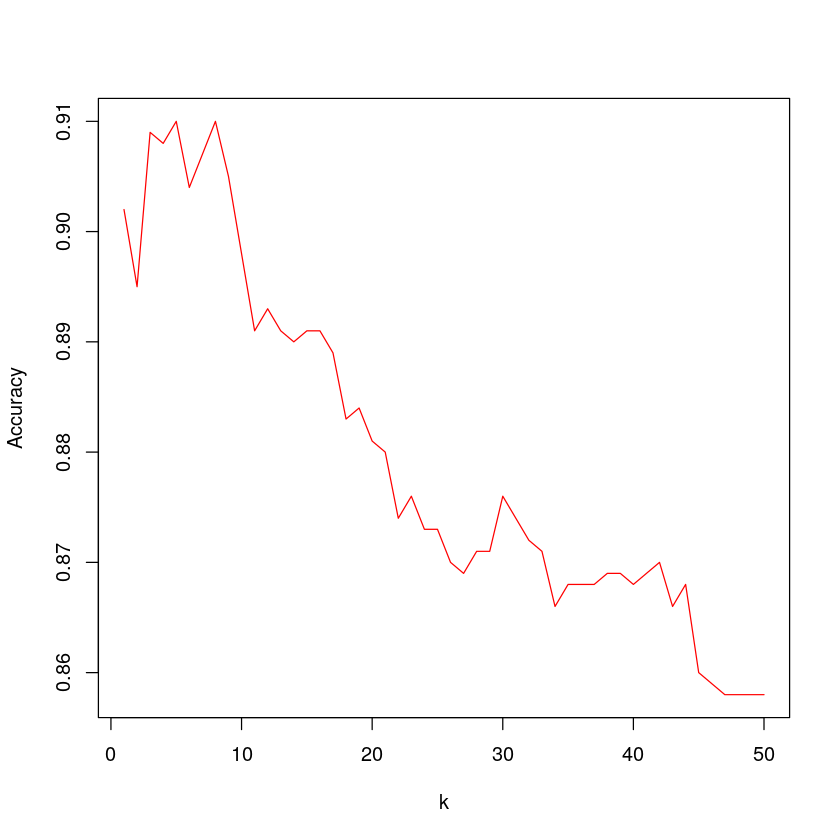

In [3]:
accuracy <- numeric(50)

for(k in 1:50) {
    classes <- k_NN(k, y_train, y_test, distances)
    accuracy[k] <- sum(classes == y_test)/length(y_test) 
}
cat("Min accuracy ", accuracy[which.min(accuracy)], " for k = ", which.min(accuracy), "\n")
cat("Max accuracy ", accuracy[which.max(accuracy)], " for k = ", which.max(accuracy), "\n")
plot(1:50, accuracy, xlab = "k", ylab = "Accuracy", type = "l", col = "red")

## Problem 2
### a)

In [4]:
X <- train$x
Y <- train$y
n <- 60000
X <- t(t(X) - rep(colMeans(X), n))
for(i in 1:ncol(X)) {
    sd <- sd(X[ ,i])
    if (sd != 0) {
        X[ ,i] <- X[ ,i]/sd
    }
}
cov_X <- t(X) %*% X /n
diag(cov_X) == 0 || diag(cov_X) == 1 #true

[1] TRUE

### b)

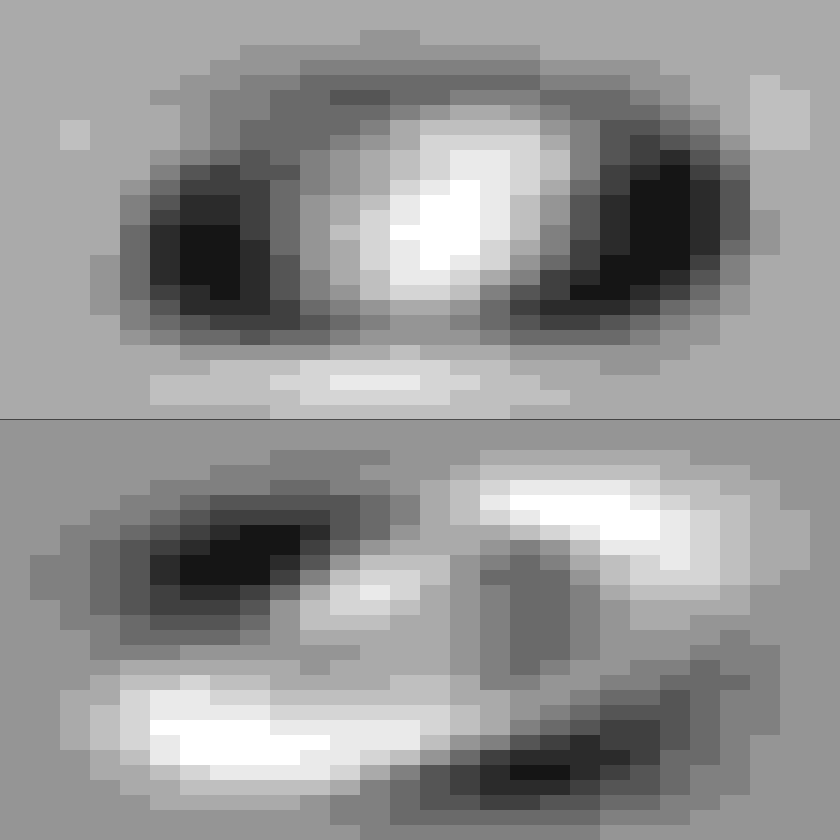

In [5]:
E <- eigen(cov_X)
eigenvectors <- E$vectors

par(mfrow=c(2,1), mar = c(0,0,0,0))
for(i in 1:2) {
    show_digit(eigenvectors[ ,i])
}

### c)

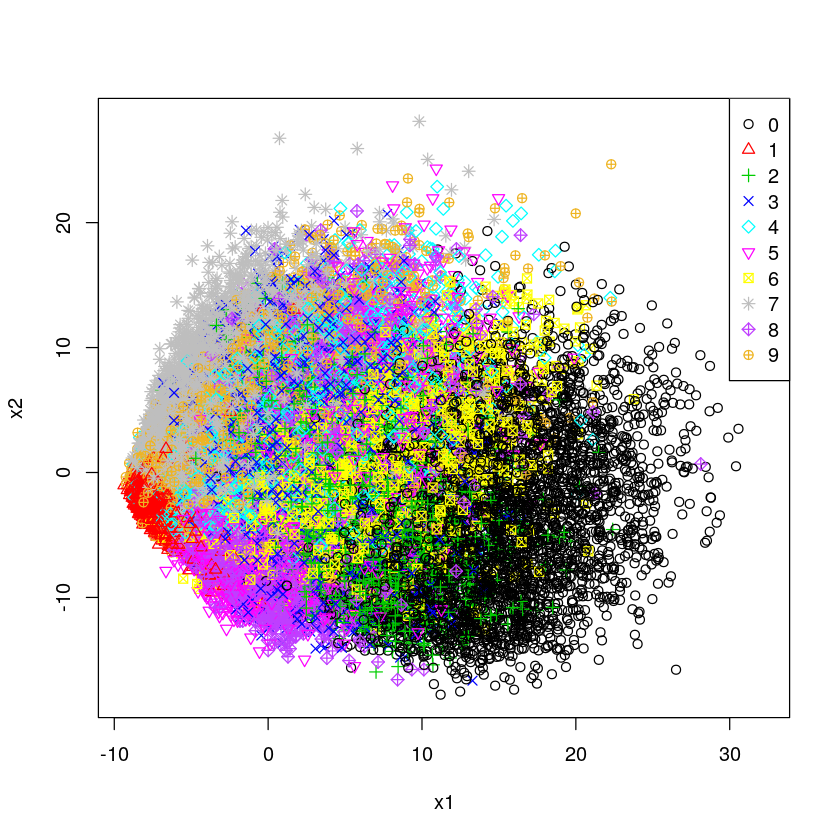

In [6]:
X_proj <- X %*% eigenvectors[ ,1:2] #first two principal components

palette("default")
colors <- palette()
palette(c(colors, "darkorchid1", "goldenrod2"))
plot(X_proj[ ,1], X_proj[ ,2], xlab = "x1", ylab = "x2", pch = Y+1, col = Y+1)
legend("topright", legend = 0:9, col = 1:10, pch = 1:10)


Interpretation to the vectors

### d)


In [7]:
X_test <- test$x[1:1000, ]
Y_test <- test$y[1:1000]

#center and normalize the test data
X_test <- t(t(X_test) - rep(colMeans(train$x), 1000))
for(i in 1:ncol(X_test)) {
    sd <- sd(train$x[ ,i])
    if (sd != 0) {
        X_test[ ,i] <- X_test[ ,i]/sd
    }
}


In [20]:
q <- c(5,10,20,40,80)

for(i in q) {
    #reduce the dimensionality of the data with q principal components
    X_redux <- X %*% eigenvectors[ ,1:i]
    X_test_redux <- X_test %*% eigenvectors[ ,1:i]

    #calculate distances
    distances <- matrix(numeric(nrow(X_redux)*nrow(X_test_redux)), nrow = nrow(X_redux))

    for(j in 1:nrow(X_redux)) {
        for(k in 1:nrow(X_test_redux)) {
            distances[j,k] <- sqrt(sum((X_redux[j, ]-X_test_redux[k, ])^2))
        }
    }

    classes <- k_NN(k=5, Y, Y_test, distances) #k=5 for all q
    cat("Accuracy = ", sum(classes == Y_test)/length(Y_test), " for q = ", i, "\n")
}

Accuracy =  0.72  for q =  5 
Accuracy =  0.891  for q =  10 
Accuracy =  0.939  for q =  20 
Accuracy =  0.95  for q =  40 
Accuracy =  0.957  for q =  80 


## Problem 3
### a)

In [9]:
confidenceInterval <- function(vector, sd) {
    lower <- mean(vector)-1.96*sd/sqrt(length(vector))
    upper <- mean(vector)+1.96*sd/sqrt(length(vector))
    return(c(lower, upper))
}

set.seed(12345)
data <- matrix(rnorm(1000*100, mean = 0, sd = 10), nrow = 1000)
count <- 0
for(m in 1:1000) {
    interval <- confidenceInterval(data[m, ], 10)
    if (interval[1] <= 0 && interval[2] >= 0) {
        count <- count + 1
    }
}
count/1000

[1] 0.96

### b)

In [10]:
bootstrapInterval <- function(vector) {
    means <- numeric(1000)
    for(k in 1:1000) {
        means[k] <- mean(sample(vector, 100, replace = TRUE))
    }
    return(quantile(means, probs = c(0.025, 0.975)))
}

count <- 0
for(m in 1:1000) {
    interval <- bootstrapInterval(data[m, ])
    if (interval[1] <= 0 && interval[2] >= 0) {
        count <- count + 1
    }
}
count/1000

[1] 0.953

### c)

In [11]:
bootstrapMedian <- function(vector) {
    medians <- numeric(1000)
    for(k in 1:1000) {
        medians[k] <- median(sample(vector, 100, replace = TRUE))
    }
    return(quantile(medians, probs = c(0.025, 0.975)))
}

count <- 0
for(m in 1:1000) {
    interval <- bootstrapMedian(data[m, ])
    if (interval[1] <= 0 && interval[2] >= 0) {
        count <- count + 1
    }
}
count/1000

[1] 0.961

In [12]:
bootstrapMax <- function(vector) {
    maxima <- numeric(1000)
    for(k in 1:1000) {
        maxima[k] <- max(sample(vector, 100, replace = TRUE))
    }
    return(quantile(maxima, probs = c(0.025, 0.975)))
}

count <- 0
for(m in 1:1000) {
    interval <- bootstrapMax(data[m, ])
    if (interval[1] <= max(data) && interval[2] >= max(data)) {
        count <- count + 1
    }
}
count/1000 #we should get 0.001, only one interval contains the maximum of the data 
max(data)
bootstrapMax(data[1,])
max(data[1,])


[1] 0.001

[1] 55.83021

2.5%    97.5% 
15.12149 16.77512

[1] 16.77512

Median is the same as mean for normal distribution, makes sense. However, no point in confidence intervals for the maximum, since it does not exist for a normally distributed variable, so we cannot check if the true value is inside the interval.